# Job-Role Recommendation System

### Importing basic Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
dir_=r'C:\Users\OMKAR\Desktop\DATASETS_ALL\Resume_dataset'

In [4]:
resumes=pd.DataFrame(columns=['content','anns'])

for file in os.listdir(dir_):
    resume=pd.read_json(dir_+'/'+file, lines=True)
    for i in range(len(resume)):
        resumes = resumes.append({'content':resume['content'][i]},ignore_index = True)
    

NameError: name 'pd' is not defined

In [5]:
resumes

NameError: name 'resumes' is not defined

### Data Cleaning (Regex)

In [5]:
import re

In [6]:
def basic_clean(x):
    cleaned=re.sub(r'[^0-9a-zA-Z()@\n\s,.]','',x)
    cleaned=cleaned.replace('\n','|') #replacing space chaarcters with '|' for better clarity
    return cleaned

In [7]:
a=resumes['content'][0]
a

'KOMAL KESARWANI \nMob: - +91-9873993532 | komalkesarwani03@gmail.com |\n\n LinkedIn: https://www.linkedin.com/in/komal-kesarwani-8b41639a/\nObjective \n\nTo achieve a challenging position in Oracle Development in a company, where acquired skills will be utilized towards continued growth and achievements.\n\nSummary\n\n· IT professional with 4.1 years of work experience in IT industry.\n\n· Having\xa0basic knowledge in\xa0Hadoop stack, HDFS, Sqoop, Pig, Hive, Cloudera\nExperience\n\nSOFTWARE ENGINEER | TATA CONSULTANCY SERVICES LIMITED | NOV 2018- Till date\n· Working on SQL, PL/SQL, ORACLE 11g and UNIX.\n· Responsible for maintaining and modifying the sql queries, functions, procedures, triggers according to the user request and fix the critical issues.\n· Providing the support for banking application as a L2 support.\n\n· Having good knowledge of PL/SQL code debugging.\n\n· Work on different tools Geneos, Control-M, putty, Wintel server.\n· Basic knowledge of Hadoop and spark.\nORACL

In [8]:
basic_clean(a)

'KOMAL KESARWANI |Mob  919873993532  komalkesarwani03@gmail.com || LinkedIn httpswww.linkedin.cominkomalkesarwani8b41639a|Objective ||To achieve a challenging position in Oracle Development in a company, where acquired skills will be utilized towards continued growth and achievements.||Summary|| IT professional with 4.1 years of work experience in IT industry.|| Having\xa0basic knowledge in\xa0Hadoop stack, HDFS, Sqoop, Pig, Hive, Cloudera|Experience||SOFTWARE ENGINEER  TATA CONSULTANCY SERVICES LIMITED  NOV 2018 Till date| Working on SQL, PLSQL, ORACLE 11g and UNIX.| Responsible for maintaining and modifying the sql queries, functions, procedures, triggers according to the user request and fix the critical issues.| Providing the support for banking application as a L2 support.|| Having good knowledge of PLSQL code debugging.|| Work on different tools Geneos, ControlM, putty, Wintel server.| Basic knowledge of Hadoop and spark.|ORACLE DEVELOPER  ESPIRE INFOLABS PVT. LTD  SEP 2015 NOV 2

#### Applying Cleaning function to dataset 

In [9]:
resumes['content']=resumes['content'].apply(lambda x: basic_clean(x))



### Feature Extraction- SKILLS

In [87]:

import spacy

# load pre-trained model
nlp = spacy.load('en_core_web_sm')


def extract_skills(resume_text):
    nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
    tokens = [token.text for token in nlp_text if not token.is_stop]
    
    # reading the csv file containng corpus of skills across all domains
    data = pd.read_csv(r"C:\Users\User\Desktop\DATASETS_ALL\skills_ - skills.csv") 
    
    # extract values
    skills = list(data.columns.values)
    
    skillset = []
    
    # check for one-grams
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)
    
    # check for bi-grams and tri-grams 
    for token in nlp_text.noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    
    return [i.capitalize() for i in set([i.lower() for i in skillset])]


In [88]:
print(extract_skills(a))

['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix', 'Mysql', 'Visual', 'Jira', 'Sql', 'Programming', 'Plsql', 'Pl/sql', 'Hadoop']


Following dummies initiated for testing.

In [119]:
test_res=resumes.head(30)

In [120]:
test_str=test_res['content'][10]

Since applying the function at one go using (.apply) takes a lot of time, tried an alt approach by 
using lists and individually fitting the function.

In [90]:
all_content_text=[resumes['content'][i] for i in range(len(resumes))]

all_content_text;

### Warning: Would take some time to complete

In [91]:
all_content_skills=[]

try:
    for i in range(len(all_content_text)):
        itr=(i/len(all_content_text))*100
        temp=extract_skills(all_content_text[i])
        all_content_skills.append(temp)
        print(f"{round(itr,2)} % completed")
finally:
    print('Finished')
    


0.0 % completed
0.03 % completed
0.06 % completed
0.1 % completed
0.13 % completed
0.16 % completed
0.19 % completed
0.22 % completed
0.26 % completed
0.29 % completed
0.32 % completed
0.35 % completed
0.38 % completed
0.42 % completed
0.45 % completed
0.48 % completed
0.51 % completed
0.54 % completed
0.58 % completed
0.61 % completed
0.64 % completed
0.67 % completed
0.7 % completed
0.74 % completed
0.77 % completed
0.8 % completed
0.83 % completed
0.86 % completed
0.89 % completed
0.93 % completed
0.96 % completed
0.99 % completed
1.02 % completed
1.05 % completed
1.09 % completed
1.12 % completed
1.15 % completed
1.18 % completed
1.21 % completed
1.25 % completed
1.28 % completed
1.31 % completed
1.34 % completed
1.37 % completed
1.41 % completed
1.44 % completed
1.47 % completed
1.5 % completed
1.53 % completed
1.57 % completed
1.6 % completed
1.63 % completed
1.66 % completed
1.69 % completed
1.73 % completed
1.76 % completed
1.79 % completed
1.82 % completed
1.85 % completed
1.8

In [93]:
all_content_skills;

In [94]:
resumes['skills']=all_content_skills

### Feature Extraction- EXPERIENCE (PREVIOUSLY WORKED JOB ROLES)

In [101]:
def extract_roles(x):
    d=pd.read_csv(r"C:\Users\User\Desktop\DATASETS_ALL\job-titles.txt")  #corpus containing every possible Job descriptions
    x=x.lower()
    #x=x.replace(' ','')
    #x=re.sub(r'[^0-9a-zA-Z]','',x)

    roles=[]
    for i in d['Job_Desigs_coll']:
        #m=i.replace(' ','')
        roles.append(i)
    found=[]  
    
    for j in roles:
        if j in x and len(j)>6 and j!='trader':
            found.append(j)
    return found
       
   


In [102]:
all_content_job=[]
try:
    for i in range(len(all_content_text)):
        itr=(i/len(all_content_text))*100
        temp=extract_roles(all_content_text[i])
        all_content_job.append(temp)
        print(f"{round(itr,2)} % completed")
finally:
    print("Finished")

0.0 % completed
0.03 % completed
0.06 % completed
0.1 % completed
0.13 % completed
0.16 % completed
0.19 % completed
0.22 % completed
0.26 % completed
0.29 % completed
0.32 % completed
0.35 % completed
0.38 % completed
0.42 % completed
0.45 % completed
0.48 % completed
0.51 % completed
0.54 % completed
0.58 % completed
0.61 % completed
0.64 % completed
0.67 % completed
0.7 % completed
0.74 % completed
0.77 % completed
0.8 % completed
0.83 % completed
0.86 % completed
0.89 % completed
0.93 % completed
0.96 % completed
0.99 % completed
1.02 % completed
1.05 % completed
1.09 % completed
1.12 % completed
1.15 % completed
1.18 % completed
1.21 % completed
1.25 % completed
1.28 % completed
1.31 % completed
1.34 % completed
1.37 % completed
1.41 % completed
1.44 % completed
1.47 % completed
1.5 % completed
1.53 % completed
1.57 % completed
1.6 % completed
1.63 % completed
1.66 % completed
1.69 % completed
1.73 % completed
1.76 % completed
1.79 % completed
1.82 % completed
1.85 % completed
1.8

In [391]:
all_content_job;

In [103]:
resumes['prev_job_roles']=all_content_job

### Feature Extraction - EXTRACTING YOE 

In [104]:

def extract_total_yoe(x):
    pattern='experience'
    x=x.lower()
    #x=x.replace(' ','')
    #print(x)
    truth=re.split(pattern,x)
    #print(truth)

    yoe_calc=[]
    returned=truth
    #print(returned)
    #tries=0

    for i in returned:
        temp=re.split(" ",i)
        #print(temp)
        
        
        for j in range(-5,5):
            try:
                cnv_int=temp[j]
                #print(cnv_int)
                #print('--------------------')
                sear=re.search('\d.\d|\d\d|\d',cnv_int)
                #print(sear)
                try:
                    if sear:
                        yoe_calc.append(float(sear.group(0)))
                except ValueError:
                    pass
                    
            except IndexError:
                break
    
    if len(yoe_calc)==1 and yoe_calc[0]>15:
        return 'NA'
    elif len(yoe_calc)==1 and yoe_calc[0]<15:
        return yoe_calc[0]
    elif len(yoe_calc)>1 and yoe_calc[0]>15:
        return min(yoe_calc)
    elif len(yoe_calc)>1 and yoe_calc[0]<15:
        return yoe_calc[0]
    else:
        return 'NA'

In [105]:
sear='1.1'

temp1=re.split(r'^[0-9]',sear)

temp1

['', '.1']

In [106]:
resumes['total_yoe']=resumes['content'].apply(lambda x: extract_total_yoe(x))



### Feature Extraction-EXTRACTING EDUCATIONAL QUALIFICATIONS

In [108]:
def extract_edu_qualf(x):
    find=['Bachelor of Engineering','Master of Engineering','bachelor of technology','master of technology','BTech','MTech','Bsc','Msc'
          'Bachelor of Business Administration','Master of Business Administration','bba','mba'
         'bachelor of computer applications','master of computer applications','bca','mca','bcom'
          'mcom','phd']
    
    for i in find:
        pattern=i.lower()
        x=x.replace('.','')
        truth=re.findall(pattern,x.lower())
        if truth:
            if pattern=='bachelor of Engineering':
                return 'btech'
            elif pattern=='master of Engineering':
                return 'mtech'
            elif pattern=='bachelor of technology':
                return 'btech'
            elif pattern=='master of technology':
                return 'mtech'
            elif pattern=='Bachelor of Business Administration':
                return 'bba'
            elif pattern=='Master of Business Administration':
                return 'mba'
            elif pattern=='bachelor of computer applications':
                return 'bca'
            elif pattern=='master of computer applications':
                return 'mca'
            else:
                return pattern

In [1]:
desc='Company Description  Tesco Bengaluru: We are a multi-disciplinary team creating a sustainable competitive advantage for Tesco by standardising processes, delivering cost savings, enabling agility, providing cutting-edge technological solutions and empowering our colleagues to do ever more for our customers. With cross-functional expertise in Global Business Services and Retail Technology & Engineering, a wide network of teams and strong governance we reduce complexity thereby offering high quality services for our customers. Tesco Bengaluru, established in 2004 to enable standardisation and build centralised capabilities and competencies, makes the experience better for our millions of customers worldwide and simpler for over 4,40,000 colleagues.  Tesco Technology consists of people from a number of different backgrounds, but having a common purpose to serve our shoppers a little better every day with our retail technological solutions. We shared a common interest in harnessing innovations in technology to enhance their shopping experience at Tesco stores. Whether making products, software or systems, our teams focuses on various aspects from taking strategic ownership of the architecture to delivering technological solutions such as design, testing, deployment, infrastructure, operation and security of the systems to ensure agile, smooth and safe operations. These help us to deliver the maximum business impact. Teams refine their internal processes to best fit their own needs, working to build core capabilities in application and services. We collaborate globally across teams to build end-to-end customer-facing solutions, as well as to share knowledge, experience, tools and techniques.  At Tesco, inclusion means that Everyones Welcome. Everyone is treated fairly and with respect; by valuing individuality and uniqueness we create a sense of belonging.  Diversity and inclusion have always been at the heart of Tesco. It is embedded in our values: we treat people how they want to be treated. We always want our colleagues to feel they can be themselves at work and we are committed to helping them be at their best.  Across the Tesco group we are building an inclusive workplace, a place to actively celebrate the cultures, personalities and preferences of our colleagues  who in turn help to build the success of our business and reflect the diversity of the communities we serve.  Job Description  This is a hands-on position where you will need to leverage your analytical mindset to find solutions to complex problems primarily focusing on computer vision solutions. As an experienced Data Scientist you will need to understand difficult business problems and prototype solutions with minimal support. Our data scientists will need to be able to validate document and present the modeling process and performances as well as communicate complex solutions in a clear understandable way to non-experts. Data Scientists are also responsible for promoting data science across Tesco and promote Tesco across the external Data Science community. You will need to use your skills in computer vision and deep learning to build proof of concepts as well production solutions making your contribution to develop and deploy Computer Vision solutions across Tesco’s environment.  You will have the opportunity to get grow improve your skills while working with an expert team as well as mentor and upskill team members. The Tesco Data Science career framework will give you the possibility to grow within the team and the company as an individual contributor or as a manager.  Qualifications  Deep Learning frameworks: Tensorflow and/or PyTorch Object detection models e.g. Faster-RCNN YOLO EfficientDet Nvidia models Libraries and tools: OpenCV scikit-image SciPy Pandas Docker Git Working knowledge of image processing and video  Additional Information  Important Notice:  On behalf of Tesco Bengaluru, we must caution all job seekers and educational institutions that Tesco Bengaluru does not authorise any third parties to release employment offers or conduct recruitment drives via a third party. Hence, beware of inauthentic and fraudulent job offers or recruitment drives from any individuals or websites purporting to represent Tesco. Further, Tesco Bengaluru does not charge any fee or other emoluments for any reason (including without limitation, visa fees) or seek compensation from educational institutions to participate in recruitment events.  Accordingly, please check the authenticity of any such offers before acting on them and where acted upon, you do so at your own risk. Tesco Bengaluru shall neither be responsible for honouring or making good the promises made by fraudulent third parties, nor for any monetary or any other loss incurred by the aggrieved individual or educational institution.  In the event that you come across any fraudulent activities in the name of Tesco Bengaluru, please feel free report the incident at recruitment_compliance_india@tesco.com'

In [2]:
desc

'Company Description  Tesco Bengaluru: We are a multi-disciplinary team creating a sustainable competitive advantage for Tesco by standardising processes, delivering cost savings, enabling agility, providing cutting-edge technological solutions and empowering our colleagues to do ever more for our customers. With cross-functional expertise in Global Business Services and Retail Technology & Engineering, a wide network of teams and strong governance we reduce complexity thereby offering high quality services for our customers. Tesco Bengaluru, established in 2004 to enable standardisation and build centralised capabilities and competencies, makes the experience better for our millions of customers worldwide and simpler for over 4,40,000 colleagues.  Tesco Technology consists of people from a number of different backgrounds, but having a common purpose to serve our shoppers a little better every day with our retail technological solutions. We shared a common interest in harnessing innova

In [110]:
resumes['qualif']=resumes['content'].apply(lambda x: extract_edu_qualf(x))

In [111]:
framed=resumes.drop(['anns'],axis=1)

In [112]:
framed;

In [113]:
framed.to_csv('Extracted_content.csv')

## Building the recommendation system 

Current idea is to cluster on the basis of three features present here, namely skills,previous job roles and educational qualifications and
later use the years of experience of each candidate to rank them accordingly in the cluster (job role) they fall into.

In [114]:
import pandas as pd
import re
new=pd.read_csv(r'./Extracted_content.csv')

In [115]:
new

Unnamed: 0                                            content  \
0              0  KOMAL KESARWANI \nMob: - +91-9873993532 | koma...   
1              1  KOMAL KESARWANI \nMob: - +91-9873993532 | koma...   
2              2  Name              : Peeyush Jain              ...   
3              3  VANCED COMPUTING \n\n \n\nPOST GRADUATE DIPLO\...   
4              4  VANCED COMPUTING \n\n \n\nPOST GRADUATE DIPLO\...   
...          ...                                                ...   
3124        3124  Aayush Dhir\nMobile: +91 9990434545\nEmail Id:...   
3125        3125  Abdul Hannan\nMSBI Developer\n\nabdul_khn786@y...   
3126        3126  RESUME\n\nEmail:qadiroracle007@gmail.com\nName...   
3127        3127  ABHAI MISHRA \nPhone: (+91)7080184576  \nEmail...   
3128        3128  CURRICULUM VITAE \n \n \n\nAbha Sharma        ...   

                                                 skills  \
0     ['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix...   
1     ['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix...   
2     ['Testing', 'Business intelligence', 'Javascri...   
3     ['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark',...   
4     ['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark',...   
...                                                 ...   
3124  ['Visual', 'Ssms', 'Testing', 'C', 'Finance', ...   
3125  ['Tableau', 'Sales', 'Ssms', 'Excel', 'Sql', '...   
3126  ['Testing', 'Sql', 'Design', 'Research', 'Pl/s...   
3127  ['Sublime', 'Html', 'Aws', 'Mysql', 'Javascrip...   
3128  ['Sublime', 'Html', 'Api', 'Aws', 'Testing', '...   

                                         prev_job_roles  total_yoe qualif  
0     ['engineer', 'it professional', 'oracle develo...        4.1  btech  
1     ['engineer', 'it professional', 'oracle develo...        4.4  btech  
2     ['analytical tech', 'engineer', 'scheduler', '...        NaN  btech  
3                                         ['architect']        8.0    NaN  
4                                         ['architect']        8.0    NaN  
...                                                 ...        ...    ...  
3124  ['engineer', 'senior software engineer', 'soft...        4.0    bca  
3125  ['analyst', 'bi developer', 'engineer', 'opera...        3.0    mca  
3126                                       ['engineer']        6.0    NaN  
3127  ['internship', 'student', 'teacher', 'team lea...        2.0    bca  
3128  ['associate', 'backend developer', 'chemist', ...        1.0  btech  

[3129 rows x 6 columns]

In [116]:
new['qualif'].isna().sum()

947

In [117]:
new['qualif'].fillna('grad',inplace=True)

In [118]:
new['qualif'].isna().sum()

0

In [125]:
#strip the string and array encodings from each element in column
def strip_(a):
    s=''
    a=re.sub(r'[^a-zA-Z\s]','',a)
    for i in a.split(' '):
        s+=i+' '
    return s

In [126]:
new['stripped_skills']=new['skills'].apply(lambda x: strip_(x))

#### Building a combined corpus from skills, yoe and prev role that would be converted to vecators and fed to the clustering algorithm 

NB: The following approach did not work per expectation as it generated a lot of noise in the data
    Thus, this approach was ddropped and an alternate approach was to cluster on the basis of skills which 
    yielded far better results.

In [120]:
def combined_string(a,b,c):
    s=''
    a=re.sub(r'[^a-zA-Z\s]','',a)
    b=re.sub(r'[^a-zA-Z\s]','',b)
    c=re.sub(r'[^a-zA-Z\s]','',c)
    #print(type(a))
    comb=a+' '+b+' '+c
    for i in comb.split(' '):
        s+=i+' '
    return s

In [121]:
new['combined']=np.vectorize(combined_string)(new['skills'],new['qualif'],new['prev_job_roles'])

In [122]:
new['combined'][0]

'Hive Debugging Oracle Spark Unix Mysql Visual Jira Sql Programming Plsql Plsql Hadoop btech engineer it professional oracle developer software engineer sql developer '

In [128]:
vect_corpus=[new['stripped_skills'][i] for i in range(len(new))]
#vect_corpus

In [129]:
from sklearn.feature_extraction.text import CountVectorizer as cv
cv=cv()

In [131]:
X_cv=cv.fit_transform(vect_corpus)

In [132]:
new['skills']

0       ['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix...
1       ['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix...
2       ['Testing', 'Business intelligence', 'Javascri...
3       ['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark',...
4       ['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark',...
                              ...                        
3124    ['Visual', 'Ssms', 'Testing', 'C', 'Finance', ...
3125    ['Tableau', 'Sales', 'Ssms', 'Excel', 'Sql', '...
3126    ['Testing', 'Sql', 'Design', 'Research', 'Pl/s...
3127    ['Sublime', 'Html', 'Aws', 'Mysql', 'Javascrip...
3128    ['Sublime', 'Html', 'Api', 'Aws', 'Testing', '...
Name: skills, Length: 3129, dtype: object

In [133]:
def build_corpus(x):
    s=''
    for i in x:
        s+=i+' '
    return s

In [134]:
#cluster_skills=resumes['skills'].apply(lambda x:build_corpus(x))

In [135]:
#cluster_skills=new['skills'].apply(lambda x: strip_(x))

In [137]:
#cluster_skills

In [88]:
#for_cluster=model.encode(cluster_skills)

In [172]:
#for_cluster=model.encode(new['combined'])

In [89]:
#for_cluster

array([[-0.00939568,  0.8733078 ,  0.56447625, ..., -0.6285007 ,
        -0.17973179,  0.24222587],
       [-0.00939568,  0.8733078 ,  0.56447625, ..., -0.6285007 ,
        -0.17973179,  0.24222587],
       [-0.23299426,  1.4316294 ,  0.5510698 , ..., -0.7208991 ,
        -0.50386   ,  0.08447277],
       ...,
       [ 0.07039536,  0.51929265,  0.96884614, ..., -0.9691588 ,
        -0.91477966,  0.24386634],
       [-0.63113487,  0.8288206 ,  0.4782681 , ..., -0.5598293 ,
        -0.55809623, -0.05274556],
       [-0.5349278 ,  1.3884956 ,  0.22163117, ..., -0.6885278 ,
        -0.13601337,  0.30767113]], dtype=float32)

In [90]:
from sklearn.preprocessing import StandardScaler as SS

scaler=SS()
scaler.fit(for_cluster)


StandardScaler()

In [91]:
for_cluster=scaler.transform(for_cluster)

In [138]:
#using PCA to reduce dimension (and noise) and also for Visualization.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_cv.toarray())
y = np.cumsum(pca.explained_variance_ratio_)

In [139]:
for i in range(len(y)):
    if y[i]>0.90:
        print(i)
        break

73


In [140]:
pca=PCA(n_components=73)
for_clustering=pca.fit_transform(X_cv.toarray())

In [141]:
pca=PCA(n_components=2)
for_viz=pca.fit_transform(X_cv.toarray())

### Model: KMeans Clustering 

In [143]:
from sklearn.cluster import KMeans
means=KMeans(3)

In [144]:
identified_clusters = means.fit_predict(for_clustering)
identified_clusters

array([1, 1, 1, ..., 0, 0, 0])

In [145]:
from sklearn.metrics import silhouette_score as ss

In [146]:
ss(for_clustering,identified_clusters)

0.07026148997283634

Text(0, 0.5, 'Silhouette score')

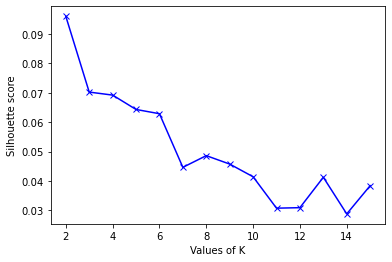

In [147]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(for_clustering)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(ss(for_clustering, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 

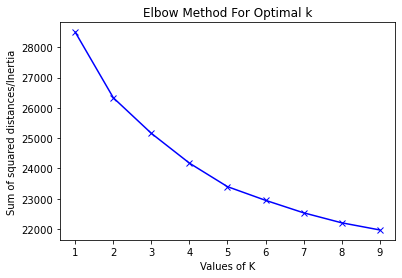

In [149]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(for_clustering)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

As per the graphs above, the ideal number of clusters can be at k=3 or k=9/10. k=2 could also have
been an accurate number but they are not considered because of less diversification.

In [183]:
new['cluster_assigned']=identified_clusters

In [184]:
for i in new[new['cluster_assigned']==0]['skills']:
    print(i)

['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark', 'Pytorch', 'C', 'Hadoop', 'Spacy', 'Excel', 'Sql', 'Programming', 'R', 'Tensorflow', 'Research', 'Keras', 'Statistical analysis', 'Python']
['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark', 'Pytorch', 'C', 'Hadoop', 'Spacy', 'Excel', 'Sql', 'Programming', 'R', 'Tensorflow', 'Research', 'Keras', 'Statistical analysis', 'Python']
['Debugging', 'Tableau', 'Mysql', 'Sales', 'Marketing', 'Matplotlib', 'Excel', 'Sql', 'Database', 'Python']
['Modeling', 'Consulting', 'Sales', 'Excel', 'Sql', 'Design', 'Etl']
['Numpy', 'Unix', 'Matplotlib', 'Seaborn', 'Pandas', 'Sql', 'Design', 'Python']
['Oracle', 'Data analysis', 'Unix', 'Powerpoint', 'Ms excel', 'Excel', 'Sql', 'Programming', 'Data management', 'Mining', 'Sas', 'Design', 'Auditing']
['Html', 'Tableau', 'Pivot', 'Data management', 'Excel', 'Sql', 'Plsql', 'Java', 'Database', 'Css', 'Ms excel', 'Design']
['Consulting', 'Html', 'Mysql', 'Powerpoint', 'Operations', 'Testing', 'C', 'Java', 'Css', 'Prog

In [185]:
for i in new[new['cluster_assigned']==1]['skills']:
    print(i)

['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix', 'Mysql', 'Visual', 'Jira', 'Sql', 'Programming', 'Plsql', 'Pl/sql', 'Hadoop']
['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix', 'Mysql', 'Visual', 'Jira', 'Sql', 'Programming', 'Plsql', 'Pl/sql', 'Hadoop']
['Testing', 'Business intelligence', 'Javascript', 'Cisco', 'Excel', 'Sql', 'Java', 'Tableau', 'Data analysis', 'Unix', 'Database', 'Hadoop', 'Python', 'Oracle', 'Programming', 'Api', 'Design', 'Linux', 'Hive', 'Sales', 'Shell']
['Mysql', 'Matlab', 'Java', 'Sql', 'Excel', 'Mining', 'Visual', 'Unix', 'C', 'Database', 'C++', 'Hadoop', 'Oracle', 'Aws', 'Powerpoint', 'Programming', 'Linux', 'Sap', 'Statistics']
['Oracle', 'Tableau', 'Testing', 'Ms excel', 'Excel', 'Sql', 'Database', 'Pl/sql']
['Hive', 'Html', 'Oracle', 'Unix', 'Lean', 'Xml', 'Testing', 'Ms excel', 'Excel', 'Sql', 'Programming', 'Agile', 'Database', 'Shell', 'Sas', 'Sdlc']
['Sales', 'Ssms', 'Testing', 'Finance', 'Sql', 'Programming', 'Ssis', 'Database', 'Design', 'Etl', 'Pyt

In [186]:
for i in new[new['cluster_assigned']==2]['skills']:
    print(i)

['Html', 'Android', 'Crm', 'Wordpress', 'C', 'Pivot', 'C#', 'Sql server', 'Sql', 'Css', 'Swift', 'Database', 'Cms', 'Php', 'Design', 'Python']
['Html', 'Oracle', 'Tableau', 'Pivot tables', 'Marketing', 'Pivot', 'Ms excel', 'Excel', 'Sql', 'Sql server', 'Database', 'Linux', 'Etl', 'Pl/sql', 'Adobe', 'Digital marketing']
['Mysql', 'Testing', 'Excel', 'Sql', 'Java', 'Asp', 'Financial reporting', 'Finance', 'Ssis', 'Database', 'Pl/sql', 'Azure', 'Pivot', 'Sql server', 'Design', 'Debugging', 'Sales', 'Shell', 'Etl', '.net']
['Cloud', 'Hive', 'Aws', 'Android', 'Azure', 'Java', 'Sql', 'Programming', 'Sql server', 'Database', 'Python', 'Hadoop']
['Modeling', 'Cloud', 'Aws', 'Android', 'Analytical skills', 'Operations', 'Business intelligence', 'Azure', 'Database', 'Java', 'Sql', 'Programming', 'Ssis', 'Excel', 'Sql server', 'Etl', 'Python']
['Modeling', 'Cloud', 'Aws', 'Android', 'Analytical skills', 'Operations', 'Business intelligence', 'Azure', 'Java', 'Sql', 'Programming', 'Ssis', 'Databas

In [187]:
import plotly.express as px
fig = px.scatter(for_viz, x=for_viz[:,0], y=for_viz[:,1],color=new['cluster_assigned'],hover_name=new['skills'],
                  log_x=False, size_max=100)
fig.show()

In [156]:
from sklearn.cluster import AgglomerativeClustering

In [157]:
clustering = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward').fit_predict(for_clustering)
 
# print the class labels
clustering

array([2, 2, 1, ..., 0, 4, 4], dtype=int64)

In [158]:

fig = px.scatter(for_viz, x=for_viz[:,0], y=for_viz[:,1],color=clustering,hover_name=new['skills'],
                  log_x=False, size_max=100)
fig.show()

In [172]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=3,min_samples=10)
dbs.fit(for_clustering)

DBSCAN(eps=3, min_samples=10)

In [173]:
dbsc=dbs.labels_

In [174]:
fig = px.scatter(for_viz, x=for_viz[:,0], y=for_viz[:,1],color=dbsc,hover_name=new['skills'],
                  log_x=False, size_max=100)
fig.show()

Resumes would be assigned jobs based on the following criterias:
    1) YOE
    2) Previous Roles
    3) Degree

In [175]:
new['total_yoe'].value_counts()

2.0      385
3.0      350
1.0      305
4.0      183
5.0      151
        ... 
68.0       1
232.0      1
6.8        1
260.0      1
198.0      1
Name: total_yoe, Length: 148, dtype: int64

The confidence level of total_yoe that was extracted from the resumes is not at all good. Since, it was 
mostly extracted from the cover letter portion by keyword-proximity matching. Hence, the reason for such
an unusual discrepency in the data. Thus, unusual values are replaced.

In [176]:
def clean_yoe(x):
    if x>9:
        x=0
    return x

In [177]:
new['total_yoe']=new['total_yoe'].apply(lambda x: clean_yoe(x))

In [178]:
new['total_yoe'].value_counts()

0.0    405
2.0    385
3.0    350
1.0    305
4.0    183
      ... 
6.8      1
7.8      1
5.2      1
8.9      1
0.8      1
Name: total_yoe, Length: 64, dtype: int64

In [179]:
new['total_yoe'].describe()

count    2625.000000
mean        2.835733
std         2.178453
min         0.000000
25%         1.000000
50%         2.500000
75%         4.000000
max         9.000000
Name: total_yoe, dtype: float64

In [180]:
new['total_yoe'].fillna(0,inplace=True)

<AxesSubplot:>

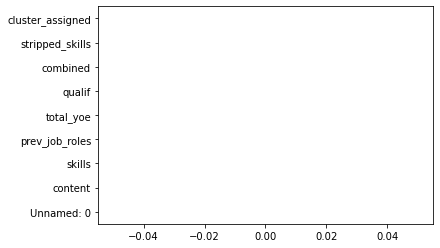

In [181]:
new.isna().sum().plot(kind='barh')

In [182]:
new['qualif'].value_counts()

btech                                1253
grad                                  947
bca                                   331
bsc                                   274
mca                                   148
bachelor of engineering               104
mtech                                  37
bba                                    27
master of business administration       8
Name: qualif, dtype: int64

## The Unsupervised Machine Learning approach seemed to be inefficient at clustering similar roles on the basis of the skills. Tried an alternative approach using jaccard_similarity

In [188]:
def Jaccard_Similarity(doc1, doc2): 
    
    # List the unique words in a document
    words_doc1 = set(doc1.lower().split()) 
    words_doc2 = set(doc2.lower().split())
    
    # Find the intersection of words list of doc1 & doc2
    intersection = words_doc1.intersection(words_doc2)

    # Find the union of words list of doc1 & doc2
    union = words_doc1.union(words_doc2)
        
    # Calculate Jaccard similarity score 
    # using length of intersection set divided by length of union set
    return float(len(intersection)) / len(union)

Following skills corpus for various roles are prepared by rsearching on the typical skills which
are needed for those roles in the market.

In [189]:
datascience_skills='Python, Scikit-learn, Sklearn, Matplotlib, Seaborn, Tensorflow , Keras, Numpy, Spark, R, NLP, Spacy, Natural Language Processing, Machine Learning, Deep Learning, Sql, Aws, Pytorch'
dataengg_skills='Sql, Pl/Sql, Oracle, MongoDB, Apache, Spark, Pyspark, Kafka, Etl, Big Data, Hadoop, Data Analysis, Ssis, SSms, Ssrs, Azure'
webdev_skills='Html5, Css, Css3, Javascript, Java, Php, Ux, Ui, Sql, React.js, Node.js, Wordpress, Xml, C++, Django'

In [197]:
test1='Python, Matplotlib, Sklearn, Tensorflow, Hadoop'
test2='Python, Scikit-learn, Sklearn, Matplotlib, Seaborn, Tensorflow , Keras, Numpy, Spark, R'

In [198]:
Jaccard_Similarity(datascience_skills,test2)

0.43478260869565216

In [208]:
def combine_to_one_string(x):
    string=''
    for i in x:
        string+=i+','+' '
    return string

In [209]:
resumes['stringed_skills']=resumes['skills'].apply(lambda x: combine_to_one_string(x))

Scoring the resumes on the basis of the cosine similarity of their skills with the datascience_skills corpus

In [22]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [214]:
scores_for_datascience=[]

for i in range(len(resumes)):

    score=Jaccard_Similarity(datascience_skills,resumes['stringed_skills'][i])
    scores_for_datascience.append(score)

In [212]:
max(scores_for_datascience)

0.24390243902439024

In [213]:
for i in range(len(sorted(scores_for_datascience))) :
    if 0.20<scores_for_datascience[i]<=max(scores_for_datascience):
        print(i)

143
199
316
1081
2025
2037
2288
2867


Scoring the resumes on the basis of the cosine similarity of their skills with the dataengg_skills corpus

In [216]:
scores_for_dataengg=[]

for i in range(len(resumes)):

    score=Jaccard_Similarity(dataengg_skills,resumes['stringed_skills'][i])
    scores_for_dataengg.append(score)

In [217]:
scores_for_webdev=[]

for i in range(len(resumes)):
    score=Jaccard_Similarity(webdev_skills,resumes['stringed_skills'][i])
    scores_for_webdev.append(score)

In [218]:
new['Data_Science_potential']=scores_for_datascience

new['Data_Engineering_potential']=scores_for_dataengg

new['Web_Development_potential']=scores_for_webdev

### Now, we can sort resumes accordingly to their scores for a particular role and pick out appropriate candidates

In [219]:
new.sort_values(by=['Data_Science_potential'],ascending=False)[:30]

Unnamed: 0                                            content  \
1081        1081  Aparna Rajawat \n\nData Scientist at Eduvanz  ...   
2288        2288  Amit Kumar Singh \nPhone No: +91 987-046-0060 ...   
2037        2037  Amit Kumar Singh \nPhone No: +91 987-046-0060 ...   
316          316  Amit Kumar Singh \nPhone No: +91 987-046-0060 ...   
2867        2867  GAURAV UPADHYAY \n e: gauravu555@gmail.com || ...   
199          199  BHAVESH PANCHAL \nPhone: 8421955003/9461168634...   
143          143  GAURAV UPADHYAY \n e: gauravu555@gmail.com || ...   
2025        2025  BHAVESH PANCHAL \nPhone: 8421955003/9461168634...   
1773        1773  MOHITAWANA\nAnalyst\n[ awanamohit5@gmail.com Ó...   
12            12  MOHITAWANA\nAnalyst\n[ awanamohit5@gmail.com Ó...   
83            83  ASIF RAZA\nData Scientist\n+917898060691/+9178...   
2169        2169  ASIF RAZA\nData Scientist\n+917898060691/+9178...   
2878        2878  Jixie George \nData Analyst/ Data Scientist \n...   
179          179  Jixie George \nData Analyst/ Data Scientist \n...   
62            62  Creating Social and Business Value using Data ...   
1275        1275  ASEEM CHAWLA  \nDATA ANALYST & BI CONSULTANT \...   
2831        2831  Creating Social and Business Value using Data ...   
3037        3037  Romika Malik\n\n\n\nEmail:rmk111294@gmail.com\...   
1735        1735  Romika Malik\n\n\n\nEmail:rmk111294@gmail.com\...   
3036        3036  Romika Malik\n\n\n\nEmail:rmk111294@gmail.com\...   
1736        1736  Romika Malik\n\n\n\nEmail:rmk111294@gmail.com\...   
2866        2866  GAURAV UPADHYAY       \n \n \n \n\nCAREER SUMM...   
142          142  GAURAV UPADHYAY       \n \n \n \n\nCAREER SUMM...   
2861        2861  Created with\n\nRohit Rajendra Kothari\nProgra...   
137          137  Created with\n\nRohit Rajendra Kothari\nProgra...   
2422        2422  Noida, Uttar-Pradesh  \n9990449463,9354419940 ...   
1871        1871  Vishal Kumar Agrawal \n\n \n\nEmail Id- vishal...   
2061        2061  Vishal Kumar Agrawal \n\n \n\nEmail Id- vishal...   
3              3  VANCED COMPUTING \n\n \n\nPOST GRADUATE DIPLO\...   
4              4  VANCED COMPUTING \n\n \n\nPOST GRADUATE DIPLO\...   

                                                 skills  \
1081  ['Mysql', 'Matplotlib', 'Operations', 'Excel',...   
2288  ['Mysql', 'Testing', 'Scikit-learn', 'Java', '...   
2037  ['Mysql', 'Testing', 'Scikit-learn', 'Java', '...   
316   ['Mysql', 'Testing', 'Scikit-learn', 'Java', '...   
2867  ['Numpy', 'Tableau', 'Data analysis', 'Matplot...   
199   ['Numpy', 'Tableau', 'Sales', 'Matplotlib', 'S...   
143   ['Numpy', 'Tableau', 'Data analysis', 'Matplot...   
2025  ['Numpy', 'Tableau', 'Sales', 'Matplotlib', 'S...   
1773  ['Numpy', 'Unix', 'Matplotlib', 'Seaborn', 'Pa...   
12    ['Numpy', 'Unix', 'Matplotlib', 'Seaborn', 'Pa...   
83    ['Cloud', 'Modeling', 'Testing', 'Scikit-learn...   
2169  ['Cloud', 'Modeling', 'Testing', 'Scikit-learn...   
2878  ['Mysql', 'Researching', 'Matplotlib', 'Operat...   
179   ['Mysql', 'Researching', 'Matplotlib', 'Operat...   
62    ['Mysql', 'Forecasting', 'Matplotlib', 'Excel'...   
1275  ['Modeling', 'Forecasting', 'Matplotlib', 'Tes...   
2831  ['Mysql', 'Forecasting', 'Matplotlib', 'Excel'...   
3037  ['Modeling', 'Mysql', 'Analytical skills', 'Ma...   
1735  ['Modeling', 'Mysql', 'Analytical skills', 'Ma...   
3036  ['Modeling', 'Mysql', 'Analytical skills', 'Ma...   
1736  ['Modeling', 'Mysql', 'Analytical skills', 'Ma...   
2866  ['Numpy', 'Tableau', 'Oracle', 'Data analysis'...   
142   ['Numpy', 'Tableau', 'Oracle', 'Data analysis'...   
2861  ['Debugging', 'Oracle', 'Operations', 'Testing...   
137   ['Debugging', 'Oracle', 'Operations', 'Testing...   
2422  ['Numpy', 'Tableau', 'Data analysis', 'Matplot...   
1871  ['Numpy', 'Tableau', 'Matplotlib', 'Seaborn', ...   
2061  ['Numpy', 'Tableau', 'Matplotlib', 'Seaborn', ...   
3     ['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark',...   
4     ['Hive', 'Api', 'Tableau', '

In [221]:
resumes['skills'][2038]

['Modeling',
 'Mysql',
 'Analytical skills',
 'Matplotlib',
 'Operations',
 'Javascript',
 'Excel',
 'Sql',
 'Java',
 'C',
 'Database',
 'C++',
 'Python',
 'Numpy',
 'Oracle',
 'Css',
 'Programming',
 'Microsoft excel',
 'Research',
 'Html',
 'Pandas']

In [222]:
new.sort_values(by=['Data_Engineering_potential'],ascending=False)[:30]

Unnamed: 0                                            content  \
2594        2594  ANITA GUPTA                             Addres...   
706          706  SUSHMITA BHARDWAJ  \nCONTACT NO- 8951847417  \...   
1280        1280  ANITA GUPTA                             Addres...   
2593        2593  ANITA GUPTA                             Addres...   
2559        2559  ANITA GUPTA                             Addres...   
2745        2745  Shyam Sunder Mishra\nSql Developer\n\nAddress:...   
1893        1893  Shyam Sunder Mishra\nSql Developer\n\nAddress:...   
2891        2891  RESUME\nAakash Saxena  \nSector 37, Noida (U.P...   
273          273  RESUME\nAakash Saxena  \nSector 37, Noida (U.P...   
1569        1569  Shreeya Jain \n\nEmail: shreeyajain32@gmail.co...   
1488        1488  SHUBHANKIT PORWAL  \n+91-8527805307  \nporwals...   
1421        1421  SHUBHANKIT PORWAL  \n           +91-8527805307...   
1674        1674  TANYA SETH\n\n1 year 7 month experience\n\nFeb...   
2675        2675  Kamini Singh\n\n· Kamini02071993@gmail.com :+9...   
2647        2647  M Madhukar \n\nRole     :      Data Steward(IN...   
26            26  Kamini Singh\n\n· Kamini02071993@gmail.com :+9...   
2611        2611  ABHISHEK CHAHAR \nContact No. – +919871531686 ...   
908          908  Nishi Siddhu  \n                              ...   
907          907  Nishi Siddhu  \n                              ...   
1530        1530  BILAL AHMAD BHAT \nEmail: ahmadbilal295@gmail....   
49            49  Rupak Kumar Ray \nGlorious Insight Private Lim...   
1993        1993  Rupak Kumar Ray \nGlorious Insight Private Lim...   
2716        2716  Krati Srivastava\n\nKratis1993@gmail.com | +91...   
610          610  RESUME\nSANJEEV VERMA\n\n\n\nMob: +91-987-3518...   
2817        2817  ASHINA GARG \nMobile: +91-7508488244 \n\nDesig...   
454          454  DEVENDER\nMobile: +919582135508, 9911446441   ...   
1794        1794  DEVENDER\nMobile: +919582135508, 9911446441   ...   
2466        2466  ASHINA GARG \nMobile: +91-7508488244 \n\nDesig...   
1541        1541  RIYA TREHAN \n\n \n116-CD, Hospital Road Tundl...   
2651        2651  Vishakha Sheoran                              ...   

                                                 skills  \
2594  ['Oracle', 'Data analysis', 'Database', 'Plsql...   
706   ['Requests', 'Tableau', 'Oracle', 'Data analys...   
1280  ['Oracle', 'Data analysis', 'Database', 'Plsql...   
2593  ['Oracle', 'Data analysis', 'Database', 'Plsql...   
2559  ['Oracle', 'Data analysis', 'Sql server', 'Sql...   
2745  ['Oracle', 'Data analysis', 'Ssms', 'Testing',...   
1893  ['Oracle', 'Data analysis', 'Ssms', 'Testing',...   
2891  ['Hive', 'Consulting', 'Data analysis', 'Spark...   
273   ['Hive', 'Consulting', 'Data analysis', 'Spark...   
1569  ['Cloud', 'Testing', 'Business intelligence', ...   
1488  ['Hive', 'Oracle', 'Spark', 'Unix', 'Mysql', '...   
1421  ['Hive', 'Oracle', 'Spark', 'Unix', 'Mysql', '...   
1674  ['Sap', 'Tableau', 'Data analysis', 'Ssms', 'M...   
2675  ['Data analysis', 'Operations', 'Testing', 'Ex...   
2647  ['Sap', 'Debugging', 'Oracle', 'Data analysis'...   
26    ['Data analysis', 'Operations', 'Testing', 'Ex...   
2611  ['Hive', 'Requests', 'Aws', 'Oracle', 'Salesfo...   
908   ['Oracle', 'Data analysis', 'Unix', 'Sales', '...   
907   ['Oracle', 'Data analysis', 'Unix', 'Sales', '...   
1530  ['Modeling', 'Oracle', 'Data analysis', 'Unix'...   
49    ['Modeling', 'Visual', 'Oracle', 'Mysql', 'Aws...   
1993  ['Modeling', 'Visual', 'Oracle', 'Mysql', 'Aws...   
2716  ['Hive', 'Debugging', 'Oracle', 'Data analysis...   
610   ['Cloud', 'Operations', 'Testing', 'Excel', 'S...   
2817  ['Visual', 'Oracle', 'Unix', 'Ssms', 'Jira', '...   
454   ['Debugging', 'Data analysis', 'Testing', 'Exc...   
1794  ['Debugging', 'Data analysis', 'Testing', 'Exc...   
2466  ['Visual', 'Oracle', 'Unix', 'Ssms', 'Jira', '...   
1541  ['Visual', 'Oracle', 'Sales', 'Testing', 'Sql ...   
2651  ['Modeling', 'Requests', 'Or

In [223]:
new.sort_values(by=['Web_Development_potential'],ascending=False)[:30]

Unnamed: 0                                            content  \
408          408  VARUN KUMAR\n \nAddress: 1/16 Nehru Nagar, Laj...   
1112        1112  Angular 2-7 & UI Developer\n\tJay Prasad\nS/o ...   
497          497  I am a UI solutions architect experience in UI...   
995          995  CURRICULUM VITAE\n\nMUKUL SHARMA\nAddress\nRc-...   
3010        3010  RAM PRAKASH\nSector-15, Noida – Uttar Pradesh,...   
2971        2971  Rizwan Ahmad\n\n\n     Email:rizwanchetu@gmail...   
364          364  CURRICULUM VITAE\nVIVEK KUMAR JAISWAL\nCommuni...   
1165        1165  EDUCATION\n\nMCA [2014-2017]\nMaster of Comput...   
478          478  CURRICULUM VITAE\nAdityaRanjan\nA-117         ...   
1538        1538  Himani Chopra \n1.4 Years’ Experience || Softw...   
2359        2359  CURRICULUM VITAE\nAdityaRanjan\nA-117         ...   
415          415  1 \n\n \n\n  \n\nSUJATA MAURYA        \nNEAR G...   
1184        1184  GAUTAM KUMAR\n20B/9\nKISHANGADH,DELHI\n110070\...   
2465        2465  SONALI SINGH \n \n\nEmail:  sonalisinghIT_06@o...   
2816        2816  SONALI SINGH \n \n\nEmail:  sonalisinghIT_06@o...   
839          839  Pankaj Kumar Prasad\nEmail id: pankaj9040@gmai...   
872          872  Navneet Yadav\n                               ...   
2598        2598  SONALI SINGH\n\nEmail:  sonalisinghIT_06@outlo...   
1006        1006   \n\nKundan Singh \nFull-Stack Javascript Deve...   
2960        2960  ANUJ GUPTA\n\nPROFILE\n\nEnergetic, dependable...   
803          803  RESUME\n\n\nPrakash Singh\nprakashaps26@gmail....   
1417        1417  ADITYA \nContact No: +91 9416691690\nEmail Id:...   
794          794  Pradeep Kumar Sharma \npradeepkrsharma@hotmail...   
1362        1362  Alok Kumar \n \n\n \n\nExpertise: Nodejs, Mong...   
2069        2069  Resume of Rishabh Gupta\nRishabh Gupta\t\t\t\t...   
456          456  RAVI KUMAR\n\n\t\n\t+91-8121207065\n\n\t\n\tra...   
613          613  Santosh kumar\nEmail Address: santosh.25dec94@...   
1222        1222  Bharat Kumar Singh\nbharat.singh40@gmail.com |...   
1170        1170  :E-mail Gauravnagar786@gmail.com :Phone +91-94...   
551          551  Shahnaz Syed \n  \n\nPersonal Info \n  \n\nAdd...   

                                                 skills  \
408   ['Mysql', 'Ui', 'Javascript', 'Java', 'Sql', '...   
1112  ['Json', 'Html', 'Mysql', 'Marketing', 'Wordpr...   
497   ['Oracle', 'Mysql', 'Ui', 'Ux', 'C', 'Javascri...   
995   ['Mysql', 'Ui', 'Javascript', 'Java', 'C', 'Ht...   
3010  ['Html', 'Ui', 'Testing', 'Ux', 'Javascript', ...   
2971  ['Html', 'Marketing', 'Ui', 'Ux', 'Javascript'...   
364   ['Html', 'Mysql', 'C', 'Javascript', 'Java', '...   
1165  ['Html', 'Mysql', 'Android', 'C', 'Javascript'...   
478   ['Html', 'Oracle', 'Mysql', 'Marketing', 'Word...   
1538  ['Cloud', 'Json', 'Html', 'Mysql', 'Ui', 'Ux',...   
2359  ['Html', 'Oracle', 'Mysql', 'Marketing', 'Word...   
415   ['Html', 'C', 'Java', 'Php', 'Css', 'Sql', 'C+...   
1184  ['Html', 'Mysql', 'Wordpress', 'Javascript', '...   
2465  ['Html', 'Oracle', 'Erp', 'Javascript', 'Java'...   
2816  ['Html', 'Oracle', 'Erp', 'Javascript', 'Java'...   
839   ['Mysql', 'Wordpress', 'Javascript', 'Java', '...   
872   ['Cloud', 'Sublime', 'Html', 'Wordpress', 'Ui'...   
2598  ['Html', 'Oracle', 'Erp', 'Javascript', 'Pl/sq...   
1006  ['Requests', 'Mysql', 'Jira', 'Ui', 'Javascrip...   
2960  ['Html', 'Mysql', 'Android', 'Ui', 'Javascript...   
803   ['Html', 'Api', 'Mysql', 'Wordpress', 'Javascr...   
1417  ['Oracle', 'Javascript', 'Rest', 'Sql', 'Java'...   
794   ['Cloud', 'Design', 'Visual', 'Aws', 'Html', '...   
1362  ['Sublime', 'Html', 'Aws', 'Mysql', 'Visual', ...   
2069  ['Consulting', 'Html', 'Visual', 'Crm', 'Javas...   
456   ['Debugging', 'Oracle', 'Mysql', 'Android', 'C...   
613   ['Json', 'Sublime', 'Html', 'Mysql', 'Ui', 'Ja...   
1222  ['Research', 'Android', 'C', 'Javascript', 'Ja...   
1170  ['Cloud', 'Html', 'Oracle', 'Wordpress', 'Ui',...   
551   ['Html', 'Android', 'Ui', 'J

### We can also assign job roles and designations (like Analyst, Data Science / Senior Analyst, Data Science) based on years of experience, education and previously worked job roles.

In [224]:
new['total_yoe']=new['total_yoe'].fillna(0)

In [225]:
def assign(x,y,z,k):
    if max(x,y,z)==x and k<3:
        return 'Analyst, Data Science'
    if max(x,y,z)==y and k<3:
        return 'Analyst, Data Engineering'
    if max(x,y,z)==z and k<3:
        return 'Analyst, Frontend Development'
    
    if max(x,y,z)==x and 2<k<5:
        return 'Senior Analyst, Data Science'
    if max(x,y,z)==y and 2<k<5:
        return 'Senior Analyst, Data Engineering'
    if max(x,y,z)==z and 2<k<5:
        return 'Senior Analyst, Frontend Development'
    if max(x,y,z)==x and k>4:
        return 'Consultant, Data Science'
    if max(x,y,z)==y and k>4:
        return 'Consultant, Data Engineering'
    if max(x,y,z)==z and k>4:
        return 'Consultant, Frontend Development'

In [226]:
new['assigned_roles']=np.vectorize(assign)(new['Data_Science_potential'],new['Data_Engineering_potential'],
                                          new['Web_Development_potential'],new['total_yoe'])

In [227]:
new

Unnamed: 0                                            content  \
0              0  KOMAL KESARWANI \nMob: - +91-9873993532 | koma...   
1              1  KOMAL KESARWANI \nMob: - +91-9873993532 | koma...   
2              2  Name              : Peeyush Jain              ...   
3              3  VANCED COMPUTING \n\n \n\nPOST GRADUATE DIPLO\...   
4              4  VANCED COMPUTING \n\n \n\nPOST GRADUATE DIPLO\...   
...          ...                                                ...   
3124        3124  Aayush Dhir\nMobile: +91 9990434545\nEmail Id:...   
3125        3125  Abdul Hannan\nMSBI Developer\n\nabdul_khn786@y...   
3126        3126  RESUME\n\nEmail:qadiroracle007@gmail.com\nName...   
3127        3127  ABHAI MISHRA \nPhone: (+91)7080184576  \nEmail...   
3128        3128  CURRICULUM VITAE \n \n \n\nAbha Sharma        ...   

                                                 skills  \
0     ['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix...   
1     ['Hive', 'Debugging', 'Oracle', 'Spark', 'Unix...   
2     ['Testing', 'Business intelligence', 'Javascri...   
3     ['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark',...   
4     ['Hive', 'Api', 'Tableau', 'Spark', 'Pyspark',...   
...                                                 ...   
3124  ['Visual', 'Ssms', 'Testing', 'C', 'Finance', ...   
3125  ['Tableau', 'Sales', 'Ssms', 'Excel', 'Sql', '...   
3126  ['Testing', 'Sql', 'Design', 'Research', 'Pl/s...   
3127  ['Sublime', 'Html', 'Aws', 'Mysql', 'Javascrip...   
3128  ['Sublime', 'Html', 'Api', 'Aws', 'Testing', '...   

                                         prev_job_roles  total_yoe qualif  \
0     ['engineer', 'it professional', 'oracle develo...        4.1  btech   
1     ['engineer', 'it professional', 'oracle develo...        4.4  btech   
2     ['analytical tech', 'engineer', 'scheduler', '...        0.0  btech   
3                                         ['architect']        8.0   grad   
4                                         ['architect']        8.0   grad   
...                                                 ...        ...    ...   
3124  ['engineer', 'senior software engineer', 'soft...        4.0    bca   
3125  ['analyst', 'bi developer', 'engineer', 'opera...        3.0    mca   
3126                                       ['engineer']        6.0   grad   
3127  ['internship', 'student', 'teacher', 'team lea...        2.0    bca   
3128  ['associate', 'backend developer', 'chemist', ...        1.0  btech   

                                               combined  \
0     Hive Debugging Oracle Spark Unix Mysql Visual ...   
1     Hive Debugging Oracle Spark Unix Mysql Visual ...   
2     Testing Business intelligence Javascript Cisco...   
3     Hive Api Tableau Spark Pyspark Pytorch C Hadoo...   
4     Hive Api Tableau Spark Pyspark Pytorch C Hadoo...   
...                                                 ...   
3124  Visual Ssms Testing C Finance Kpi Excel Sql Sq...   
3125  Tableau Sales Ssms Excel Sql Sql server Ssis D...   
3126   Testing Sql Design Research Plsql grad engineer    
3127  Sublime Html Aws Mysql Javascript Css Js Cms D...   
3128  Sublime Html Api Aws Testing Chemistry Ubuntu ...   

                                        stripped_skills  cluster_assigned  \
0     Hive Debugging Oracle Spark Unix Mysql Visual ...                 1   
1     Hive Debugging Oracle Spark Unix Mysql Visual ...                 1   
2     Testing Business intelligence Javascript Cisco...                 1   
3     Hive Api Tableau Spark Pyspark Pytorch C Hadoo...                 0   
4     Hive Api Tableau Spark Pyspark Pytorch C Hadoo...                 0   
...                                                 ...               ...   
3124  Visual Ssms Testing C Finance Kpi Excel Sql Sq...                 2   
3125  Tableau Sales Ssms Excel Sql Sql server Ssis D...                 2   
3126                 Testing Sql Design Research Plsql                  0   
3127  Sublime Html Aws Mysql Javascript 

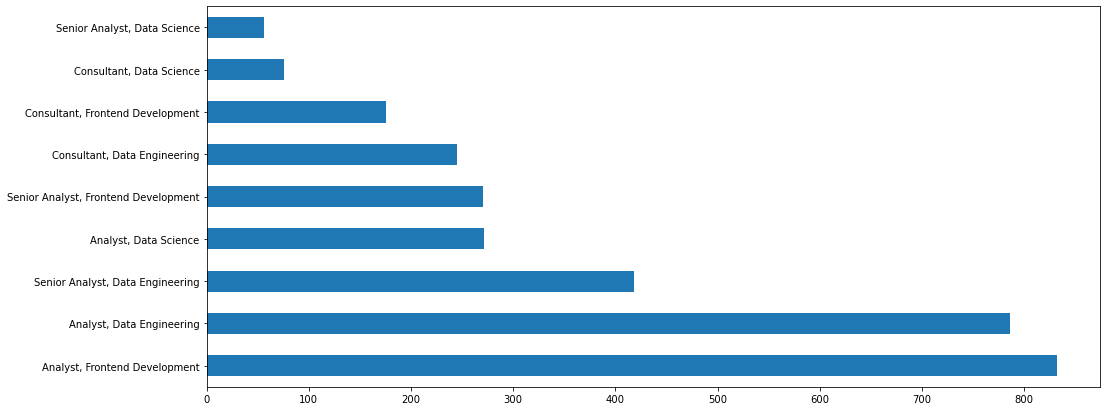

In [228]:
new['assigned_roles'].value_counts().plot(kind='barh',figsize=(16,7));